In [1]:
import pandas_datareader as pdr
key="5bbde61d68063a2e63c34865c8466dac476a7960"

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-08-23 00:00:00+00:00,108.85,109.32,108.53,108.590,21257669,25.516376,25.626552,25.441362,25.455427,85030676,0.0,1.0
1,AAPL,2016-08-24 00:00:00+00:00,108.03,108.75,107.68,108.565,23675081,25.324153,25.492934,25.242107,25.449566,94700324,0.0,1.0
2,AAPL,2016-08-25 00:00:00+00:00,107.57,107.88,106.68,107.390,25086248,25.216321,25.288990,25.007689,25.174126,100344992,0.0,1.0
3,AAPL,2016-08-26 00:00:00+00:00,106.94,107.95,106.31,107.410,27766291,25.068638,25.305400,24.920954,25.178814,111065164,0.0,1.0
4,AAPL,2016-08-29 00:00:00+00:00,106.82,107.44,106.29,106.620,24970300,25.040507,25.185846,24.916266,24.993624,99881200,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-08-16 00:00:00+00:00,151.12,151.19,146.47,148.535,103558782,151.12,151.19,146.47,148.535,103558782,0.0,1.0
1254,AAPL,2021-08-17 00:00:00+00:00,150.19,151.68,149.09,150.230,92229735,150.19,151.68,149.09,150.230,92229735,0.0,1.0
1255,AAPL,2021-08-18 00:00:00+00:00,146.36,150.72,146.15,149.800,86325990,146.36,150.72,146.15,149.800,86325990,0.0,1.0
1256,AAPL,2021-08-19 00:00:00+00:00,146.70,148.00,144.50,145.030,86960310,146.70,148.00,144.50,145.030,86960310,0.0,1.0
1257,AAPL,2021-08-20 00:00:00+00:00,148.19,148.50,146.78,147.440,60549630,148.19,148.50,146.78,147.440,60549630,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0       108.85
1       108.03
2       107.57
3       106.94
4       106.82
         ...  
1253    151.12
1254    150.19
1255    146.36
1256    146.70
1257    148.19
Name: close, Length: 1258, dtype: float64

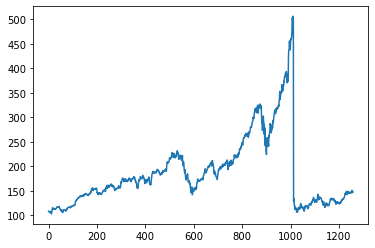

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
import numpy as np

In [12]:
df1

0       108.85
1       108.03
2       107.57
3       106.94
4       106.82
         ...  
1253    151.12
1254    150.19
1255    146.36
1256    146.70
1257    148.19
Name: close, Length: 1258, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.01419496]
 [0.01216002]
 [0.01101846]
 ...
 [0.10728112]
 [0.10812488]
 [0.11182251]]


In [15]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(817, 441)

In [17]:
train_data

array([[0.01419496],
       [0.01216002],
       [0.01101846],
       [0.00945503],
       [0.00915724],
       [0.0071223 ],
       [0.00737046],
       [0.00893389],
       [0.01141553],
       [0.01134108],
       [0.01297896],
       [0.00593111],
       [0.        ],
       [0.00573258],
       [0.01196149],
       [0.02144133],
       [0.03087155],
       [0.02925849],
       [0.0259331 ],
       [0.02590828],
       [0.02585865],
       [0.028514  ],
       [0.02377407],
       [0.02419595],
       [0.02471709],
       [0.0268513 ],
       [0.0224588 ],
       [0.02461783],
       [0.02330256],
       [0.02449375],
       [0.02461783],
       [0.0267024 ],
       [0.02712428],
       [0.03206274],
       [0.03268314],
       [0.03526405],
       [0.03437066],
       [0.03598372],
       [0.03578519],
       [0.03558666],
       [0.03471809],
       [0.03456919],
       [0.03342764],
       [0.03603335],
       [0.03752233],
       [0.03092118],
       [0.02816657],
       [0.026

In [18]:
import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [21]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 4s 298ms/step - loss: 1.2990e-04 - val_loss: 0.0115
Epoch 2/100
12/12 [==============================] - 3s 280ms/step - loss: 1.2441e-04 - val_loss: 0.0114
Epoch 3/100
12/12 [==============================] - 3s 265ms/step - loss: 1.3158e-04 - val_loss: 0.0103
Epoch 4/100
12/12 [==============================] - 3s 267ms/step - loss: 1.5796e-04 - val_loss: 0.0111
Epoch 5/100
12/12 [==============================] - 3s 268ms/step - loss: 1.4314e-04 - val_loss: 0.0114
Epoch 6/100
12/12 [==============================] - 3s 278ms/step - loss: 1.2430e-04 - val_loss: 0.0107
Epoch 7/100
12/12 [==============================] - 3s 279ms/step - loss: 1.2373e-04 - val_loss: 0.0086
Epoch 8/100
12/12 [==============================] - 3s 278ms/step - loss: 1.2416e-04 - val_loss: 0.0101
Epoch 9/100
12/12 [==============================] - 3s 281ms/step - loss: 1.1641e-04 - val_loss: 0.0108
Epoch 10/100
12/12 [==============================] - 3

In [27]:
import tensorflow as tf

In [28]:
tf.__version__

'2.6.0'

In [29]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [30]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

184.17125352128156

In [32]:
math.sqrt(mean_squared_error(ytest,test_predict))

243.01622920807137

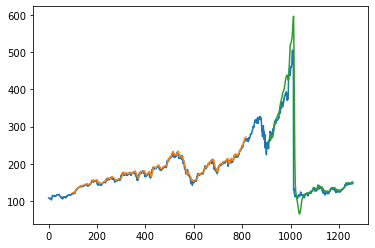

In [33]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
len(test_data)

441

In [35]:

x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
temp_input

[0.047200714711137626,
 0.04931010522136198,
 0.05650684931506855,
 0.05727615644232681,
 0.06147012110383171,
 0.06757494540401038,
 0.0741140559857058,
 0.06975878499106619,
 0.07767520349414342,
 0.07171927734762762,
 0.07784891800675009,
 0.07700516180266037,
 0.07869267421083981,
 0.07439944411355975,
 0.07536728211236854,
 0.07149593011713323,
 0.07740222354576137,
 0.07839487790351402,
 0.0775759380583681,
 0.07556581298391907,
 0.07531764939448088,
 0.07030474488783012,
 0.0729849116537622,
 0.06134603930911259,
 0.061966448282707975,
 0.06603633114949381,
 0.06720270001985312,
 0.05886440341473104,
 0.056531665674012355,
 0.048739328965654194,
 0.05419892793329367,
 0.06035338495136,
 0.05742505459598973,
 0.05390113162596788,
 0.05350406988286682,
 0.06000595592614655,
 0.055340480444709184,
 0.059484812388326425,
 0.0589884852094501,
 0.05886440341473104,
 0.054968235060551984,
 0.053305539011316294,
 0.05248659916617038,
 0.054422275163788,
 0.05065018860432802,
 0.05648203

In [38]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.11958019]
101
1 day input [0.04931011 0.05650685 0.05727616 0.06147012 0.06757495 0.07411406
 0.06975878 0.0776752  0.07171928 0.07784892 0.07700516 0.07869267
 0.07439944 0.07536728 0.07149593 0.07740222 0.07839488 0.07757594
 0.07556581 0.07531765 0.07030474 0.07298491 0.06134604 0.06196645
 0.06603633 0.0672027  0.0588644  0.05653167 0.04873933 0.05419893
 0.06035338 0.05742505 0.05390113 0.05350407 0.06000596 0.05534048
 0.05948481 0.05898849 0.0588644  0.05496824 0.05330554 0.0524866
 0.05442228 0.05065019 0.05648203 0.05650685 0.05859142 0.05955926
 0.05702799 0.06010522 0.06787274 0.06578817 0.0670538  0.07112368
 0.06782311 0.07238932 0.07655847 0.07586361 0.07514393 0.07439944
 0.07854378 0.08239031 0.08395374 0.08472305 0.09139865 0.09651082
 0.10283899 0.09953842 0.10417907 0.10266528 0.10549434 0.11420488
 0.11254219 0.10735557 0.09757792 0.10675998 0.10489875 0.10837304
 0.11274072 0.11380782 0.10829859 0.10385646 0.10549434 0.1060403
 0.10519655 0.10976276 0.10874528 0

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [40]:
import matplotlib.pyplot as plt

In [41]:
len(df1)

1258

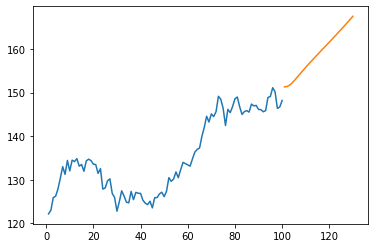

In [42]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

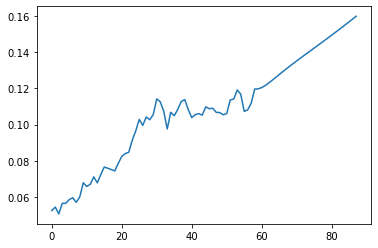

In [43]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [44]:
df3=scaler.inverse_transform(df3).tolist()

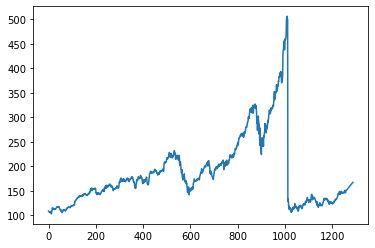

In [45]:
plt.plot(df3)